# Курсовая работа по дисциплине «Технологии анализа данных и машинное обучение»
*Тема работы:*   
«Исследование эффективности ансамблевых моделей на  
примере задачи классификации на реальных данных.»

*Выполнил студент ПМ22-1*  
Ешеров Амин

*Научный руководитель*  
Каплевский Александр

# 1. Проблема и набор данных

In [ ]:
!pip install catboost

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut, cross_val_score

from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

from yellowbrick.classifier import (ROCAUC, PrecisionRecallCurve)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna

Датасет представляет собой признаки музыкальных
композиций, собранных **Spotify**.  
Таргетной переменной был выбран музыкальный жанр.  

По данным признакам необходимо предсказать музыкальный жанр трека. (Задача классификации)


In [ ]:
df = pd.read_csv('/kaggle/input/music-genre/music_genre.csv')
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


# 2. Предварительный анализ и предобработка данных


## Предварительная характеристика

In [ ]:
df.shape

(50005, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

На первый взгляд данные относительно полные.

In [ ]:
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


Можно заметить, что почти все численные признаки измеряются по шкале от 0 до 1.

In [ ]:
df['music_genre'].value_counts()

music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64

Классы полностью сбалансированны.

## Удаление нерелевантных признаков

Удалим признаки **'instance_id'** и **'obtained_date'**, т.к. они не имеют никакого физического значения, нужного для моделировании.

In [ ]:
df = df.drop(['instance_id', 'obtained_date'], axis=1)

Рассмотрим признаки **'artist_name'** и **'track_name'**.  
Можно заметить, что уникальных значений для этих признаков очень много, и практическую ценность они навряд ли несут, и в целях эффективности и скорости моделирования, мы удалим эти признаки,  тем самым не создавая десятки тысяч новых столбцов с помощью OneHotEncoder.

In [ ]:
categorical_data = df.select_dtypes(include=['object'])
categorical_data.describe()

,artist_name,track_name,key,mode,tempo,music_genre
count,50000,50000,50000,50000,50000,50000
unique,6863,41699,12,2,29394,10
top,empty_field,Home,G,Major,?,Electronic
freq,2489,16,5727,32099,4980,5000


In [ ]:
df = df.drop(['artist_name', 'track_name'], axis=1)

## Обработка пропущенных значений

### Значения, явно указанные как NaN

In [ ]:
print(f'Количетсво пропущенных значений: {df.isna().sum().sum()}')
df.isna().sum()

Количетсво пропущенных значений: 70


popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
valence             5
music_genre         5
dtype: int64

In [ ]:
# Пропущенные значения
nan_rows = df[df.isna().any(axis=1)]
nan_rows

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


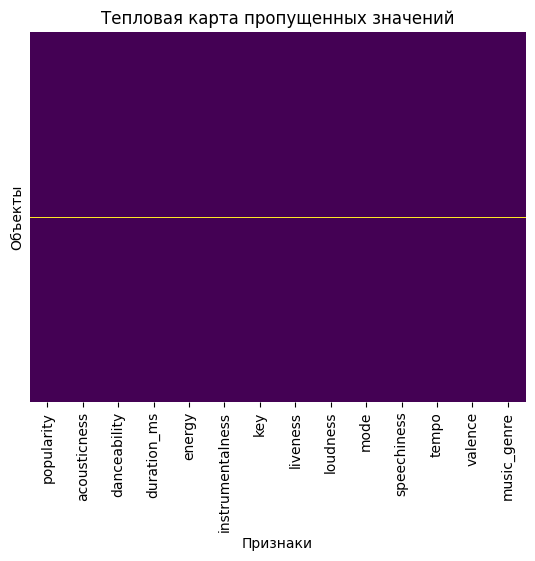

In [ ]:
sns.heatmap(df[9000:11000].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Тепловая карта пропущенных значений')
plt.xlabel('Признаки')
plt.ylabel('Объекты')
plt.show()

Видно, что значения пропущены равномерно и не имеют никакого значения, следовательно, они могут быть спокойно удалены.

In [ ]:
df = df.dropna()

In [ ]:
print(f'Количетсво пропущенных значений {df.isna().sum().sum()}')
df.isna().sum()

Количетсво пропущенных значений 0


popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

### Значения, не указанные явно как NaN

Теперь проверим, нет ли отсутствующих значений не обозначенных, как NaN.

In [ ]:
categorical_data.describe()

,artist_name,track_name,key,mode,tempo,music_genre
count,50000,50000,50000,50000,50000,50000
unique,6863,41699,12,2,29394,10
top,empty_field,Home,G,Major,?,Electronic
freq,2489,16,5727,32099,4980,5000


Можно заметить, в признаке **'tempo'** пропущенные значения обозначены символом '?' и их 4980.

In [ ]:
non_trivial_nans_df = df[df['tempo'] == '?']

In [ ]:
(df['tempo'] == '?').value_counts(normalize=True)

tempo
False    0.9004
True     0.0996
Name: proportion, dtype: float64

<Axes: >

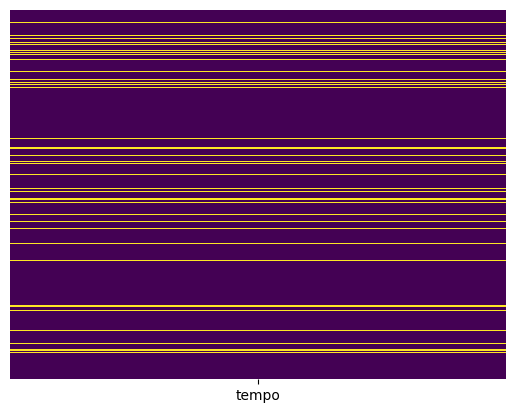

In [ ]:
non_trivial_nans = (df['tempo'] == '?')
missing_values_df = non_trivial_nans.to_frame()

sns.heatmap(missing_values_df, yticklabels=False, cbar=False, cmap='viridis')

Предварительно, посмотрим на распределение признака **'tempo'**.

<Axes: xlabel='tempo', ylabel='Count'>

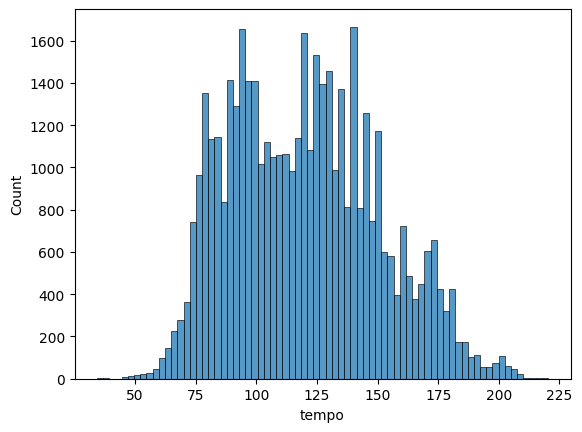

In [ ]:
tempo = df['tempo'].replace('?', np.nan)
tempo_float = tempo.astype(float)
sns.histplot(tempo_float)

Так как неизвестных значений довольно много (почти 10%) замена на среднее или медиану может сильно исказить распределение. По этой причине произведем замену случайным значением из распределения.

In [ ]:
num = pd.to_numeric(df['tempo'], errors='coerce')

In [ ]:
filler = num[num.isna()]
filler

5       NaN
32      NaN
35      NaN
36      NaN
39      NaN
         ..
49918   NaN
49964   NaN
49967   NaN
49976   NaN
49977   NaN
Name: tempo, Length: 4980, dtype: float64

In [ ]:
filler_new = num[~num.isna()].sample(n=len(filler)).set_axis(filler.index)
filler_new

5        160.030
32       137.418
35        99.333
36       159.886
39       107.169
          ...   
49918    106.523
49964     90.929
49967    144.617
49976    107.678
49977     77.013
Name: tempo, Length: 4980, dtype: float64

In [ ]:
df.tempo = num.fillna(filler_new)

<Axes: xlabel='tempo', ylabel='Count'>

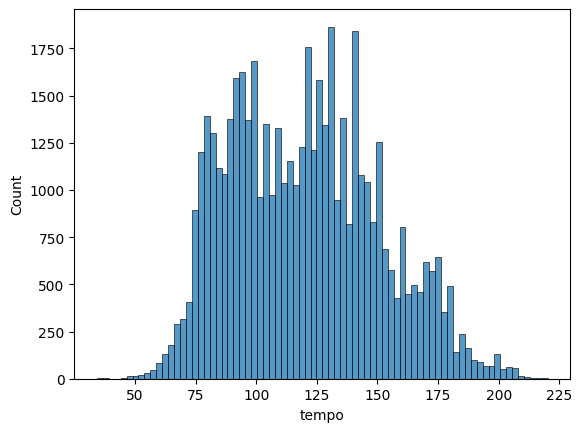

In [ ]:
sns.histplot(df.tempo)

Распределение в целом не поменялось.

В признаке **'duration_ms'** отсутсвующие значения отмечены значением '-1'.  
 Посмотрим на распределение и сделаем вывод о методы заполнения отсутствующих значений.

In [ ]:
df['duration_ms'].describe()

count    5.000000e+04
mean     2.212526e+05
std      1.286720e+05
min     -1.000000e+00
25%      1.748000e+05
50%      2.192810e+05
75%      2.686122e+05
max      4.830606e+06
Name: duration_ms, dtype: float64

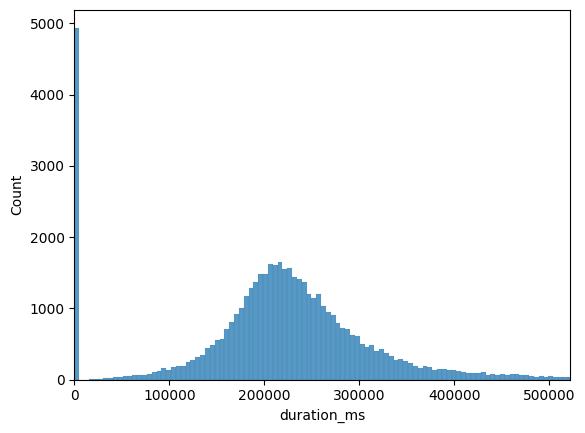

In [ ]:
sns.histplot(df['duration_ms'])
plt.xlim(0, 5.22e+05)
plt.show()

Заменим случайным, чтобы сохранить нормальность распределения.

In [ ]:
df['duration_ms'].replace(-1, pd.NA, inplace=True)

In [ ]:
filler = df['duration_ms'][df['duration_ms'].isna()]
filler

0        <NA>
13       <NA>
16       <NA>
24       <NA>
35       <NA>
         ... 
49956    <NA>
49969    <NA>
49979    <NA>
49981    <NA>
50000    <NA>
Name: duration_ms, Length: 4939, dtype: object

In [ ]:
filler_new = df['duration_ms'][~df['duration_ms'].isna()].sample(n=len(filler)).set_axis(filler.index)
filler_new

0        305440.0
13       212307.0
16       188269.0
24       485507.0
35       228093.0
           ...   
49956    188000.0
49969    250493.0
49979    171480.0
49981    371253.0
50000    206307.0
Name: duration_ms, Length: 4939, dtype: object

In [ ]:
df['duration_ms'] = df['duration_ms'].fillna(filler_new)

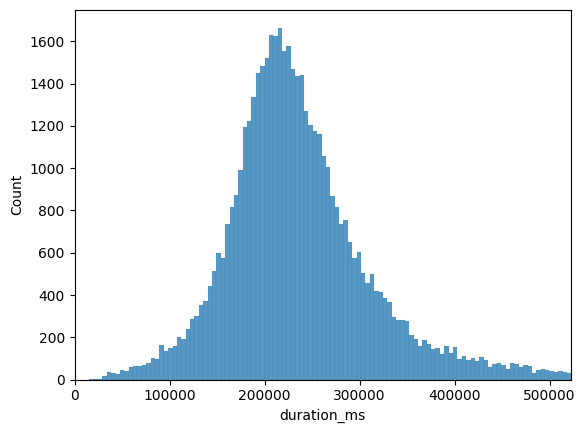

In [ ]:
sns.histplot(df['duration_ms'])
plt.xlim(0, 5.22e+05)
plt.show()

Замена на случайное значение сохранило нормальное распределение.

## Физический смысл признаков

In [ ]:
df.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'music_genre'],
      dtype='object')

**'instance_id'** - уникальный идентификатор объекта  
**'artist_name'** - имя артиста  
**'track_name'** - название трека  
**'popularity'** - популярность трека  
**'acousticness'** - акустичность трека (используются исключительно или по большей части инструменты, воспроизводящие звук с помощью акустических средств, а не электрических или электронных.)  
**'danceability'** - оценивает, насколько подходящий трек для танцев, основываясь на комбинации музыкальных элементов, включая темп, стабильность ритма, сила удара и общую регулярность.  
**'duration_ms'** - длительность трека в миллисекундах  
**'energy'** - представляет собой воспринимаемую меру интенсивности и активности. Обычно энергичные треки ощущаются быстрыми, громкими и шумными. Например, дэт-металл обладает высокой энергией, в то время как прелюдия Баха набирает низкие баллы по шкале.  
**'instrumentalness'** - инструментальность трека (Чем ближе значение инструментальности к 1.0, тем выше вероятность, что в треке отсутствует вокальное содержание.)  
**'key'** -  знак линейной нотации, определяющий звуковысотное значение нот. (отсутствие ключа обозначается "-1")  
**'liveness'** - более высокие значения указывают на большую вероятность того, что трек был исполнен живьем.  
**'loudness'** - громкость трека в децибелах  
**'mode'** - модальность  
**'speechiness'** - мера разговорности в треке (насколько в треке много разговоров)  
**'tempo'** - тепм в ударах в минуту  
**'obtained_date'** - дата получения трека  
**'valence'** - Показатель, описывающий музыкальную положительность, передаваемую треком. Треки с высоким показателем валентности звучат более положительно (например, весело, радостно, эйфорично), в то время как треки с низким показателем валентности звучат более негативно (например, грустно, подавленно, злобно).

## Преобразование категориальных признаков

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['key', 'mode', 'music_genre'], dtype='object')

In [ ]:
df[object_columns].describe()

,key,mode,music_genre
count,50000,50000,50000
unique,12,2,10
top,G,Major,Electronic
freq,5727,32099,5000


Преобразуем категориальные признаки в численные.  
Из них можно выделить **'mode'** как бинарный признак.

### Преобразование бинарных признаков

In [ ]:
df['mode']

0        Minor
1        Minor
2        Major
3        Major
4        Major
         ...  
50000    Major
50001    Major
50002    Major
50003    Minor
50004    Minor
Name: mode, Length: 50000, dtype: object

In [ ]:
le = LabelEncoder()
mode_enc = le.fit_transform(df['mode'])
mode_enc

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
df['mode'] = mode_enc
df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,305440.0,0.941,0.79200,A#,0.115,-5.201,1,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,1,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,0,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,0,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,0,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,206307.0,0.574,0.00000,C#,0.119,-7.022,0,0.2980,98.028,0.330,Hip-Hop
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,0,0.0550,122.043,0.113,Hip-Hop
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,0,0.1460,131.079,0.395,Hip-Hop
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,1,0.0441,75.886,0.354,Hip-Hop


### Преобразование номинальных признаков

Закодируем **'key'** с помощью *OneHotEncoder*.

In [ ]:
OH_key = OneHotEncoder(sparse_output=False)

In [ ]:
dummies = pd.DataFrame(OH_key.fit_transform(df[['key']]),
                       columns=OH_key.get_feature_names_out(['key']),
                       index = df.index)

In [ ]:
df_dum = pd.concat([df, dummies], axis=1).drop(['key'], axis=1)

In [ ]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 50004
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   liveness          50000 non-null  float64
 7   loudness          50000 non-null  float64
 8   mode              50000 non-null  int64  
 9   speechiness       50000 non-null  float64
 10  tempo             50000 non-null  float64
 11  valence           50000 non-null  float64
 12  music_genre       50000 non-null  object 
 13  key_A             50000 non-null  float64
 14  key_A#            50000 non-null  float64
 15  key_B             50000 non-null  float64
 16  key_C             50000 non-null  float64
 17

Все категориальные признаки преобразованы в числовые;  
 все отсутствующие значения заполнены;

# 3. Описательный анализ и визуализация

### Распределение численных признаков

In [ ]:
num_cols = df_dum.columns[:12]
num_cols.shape

(12,)

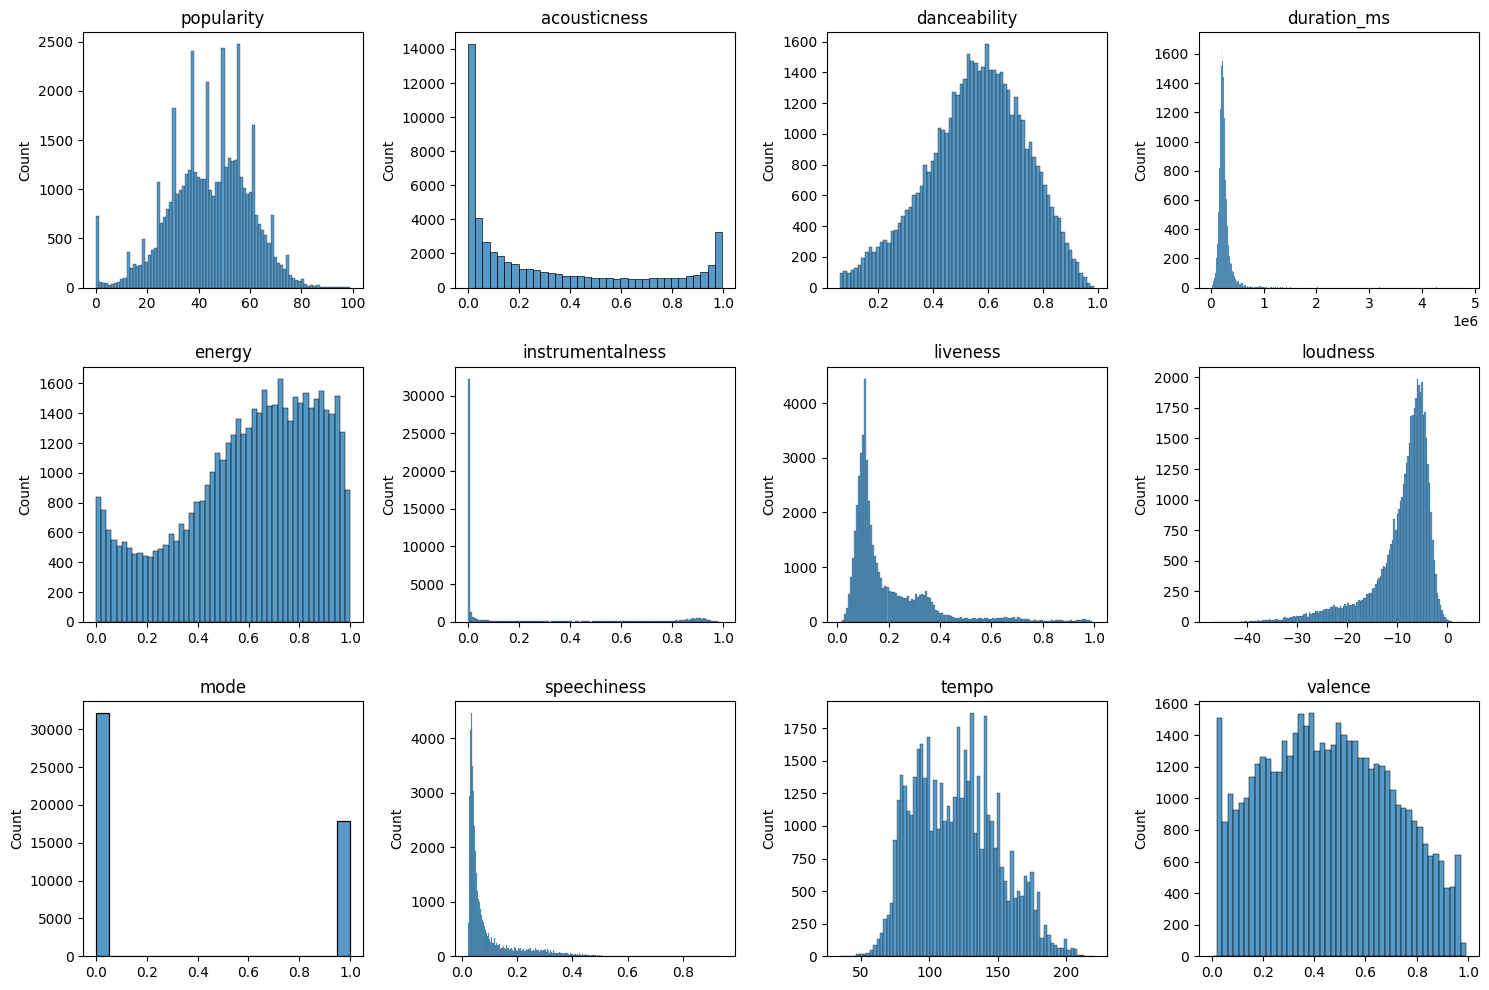

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # 3 rows, 4 columns

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df_dum[col], ax=axes[i])
    axes[i].set_title(col)  # Set title as column name
    axes[i].set_xlabel('')  # Remove x-axis label for better visualization

plt.tight_layout()
plt.show()

### Распределение категориальных признаков

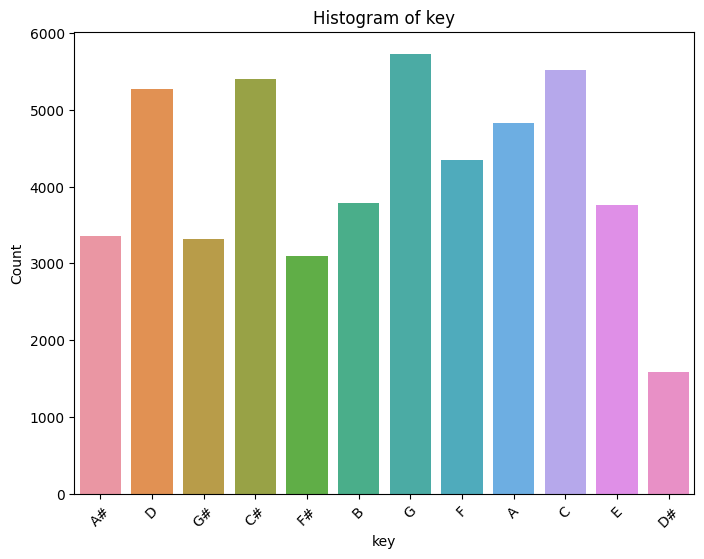

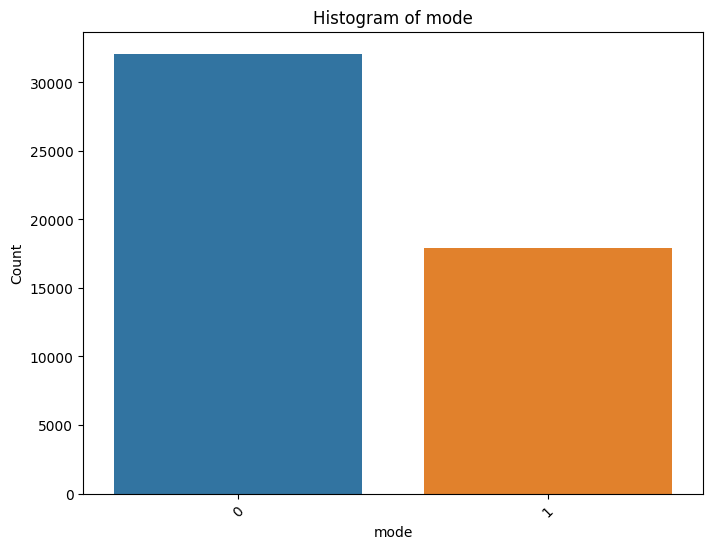

In [ ]:
categorical_columns = ['key', 'mode']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### Совместное распределение призаков с целевой переменной

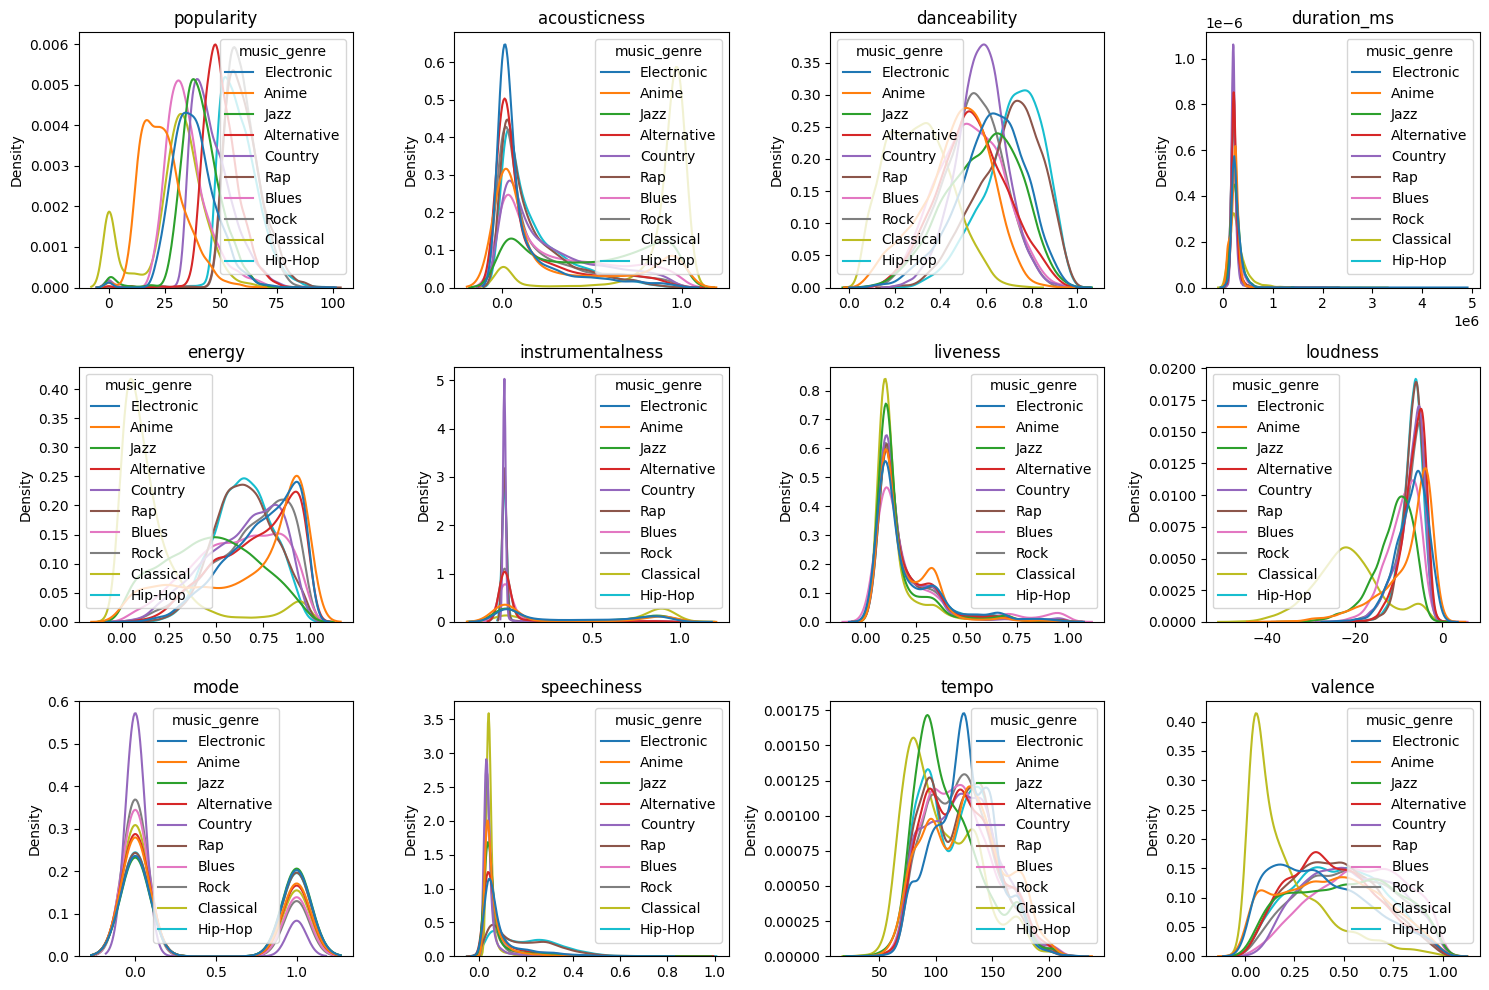

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # 3 rows, 4 columns

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df_dum, x=col, hue="music_genre", ax=axes[i])
    axes[i].set_title(col)  # Set title as column name
    axes[i].set_xlabel('')  # Remove x-axis label for better visualization

plt.tight_layout()
plt.show()

Графики плоности показывают, что признаки '**duration_ms**', '**liveness**', '**mode**' и '**speechiness**' не имеют ярко выделенных участков на горизонтальной оси, на которых соотношение существенно отличается.  
Из этого можно сделать вывод, что изолированно данные атрибуты не сильно влияют на значение целевой переменной.  
Удалять данные признаки мы пока не станем, проведем дополнительный анализ.


### Выявление коррелированных признаков

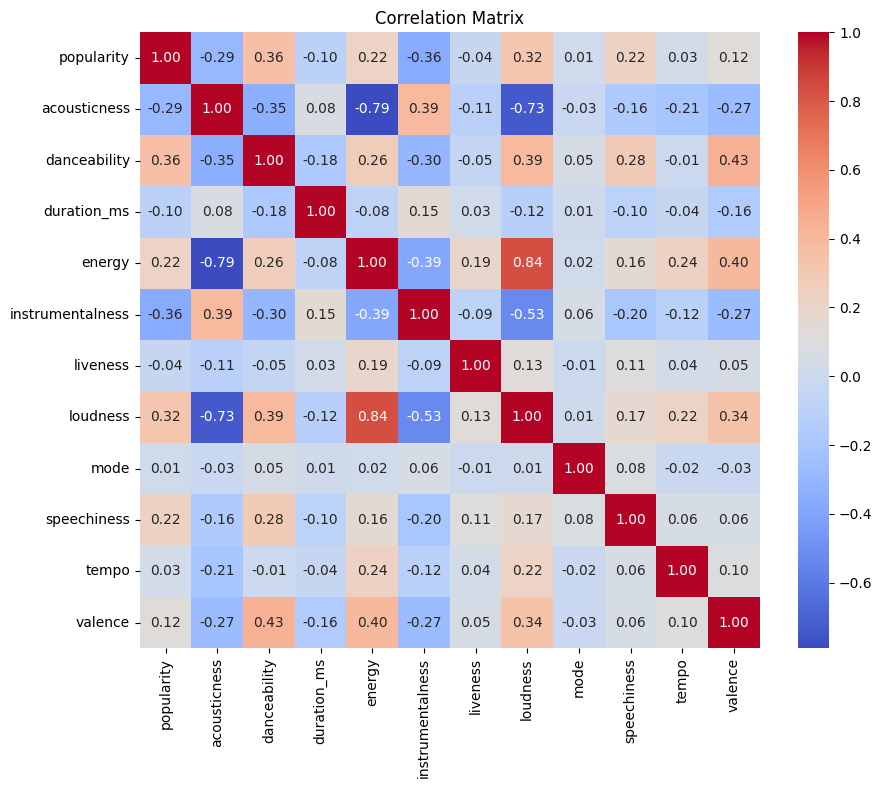

In [ ]:
correlation_matrix = df_dum[num_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Можно заметить сильную связь между парами признаков: '**loudness**' и '**energy**', '**acousticness**' и '**energy**'.

# 4. Обучение модели с помощью “слабых” учеников

### Разделение набора данных на обучающую и тестовую выборки.

In [ ]:
X = df_dum.drop(['music_genre'], axis=1)
X

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,27.0,0.00468,0.652,117867.0,0.941,0.79200,0.115,-5.201,1,0.0748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,1,0.0300,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0,0.0345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0,0.2390,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0,0.0413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,211144.0,0.574,0.00000,0.119,-7.022,0,0.2980,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,0,0.0550,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,0,0.1460,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,1,0.0441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y = df_dum['music_genre']
y

0        Electronic
1        Electronic
2        Electronic
3        Electronic
4        Electronic
            ...    
50000       Hip-Hop
50001       Hip-Hop
50002       Hip-Hop
50003       Hip-Hop
50004       Hip-Hop
Name: music_genre, Length: 50000, dtype: object

Дисбаланса классов как и временной компоненты в данных нет, можно разделять на тренировочную и тестовую выборки случайным образом.  
Выберем разделение 80/20, т.к. датасет довольно большой.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

### Обучение моделей

In [ ]:
names = ["Logistic Regression", "Nearest Neighbors", "Decision Tree", "Naive Bayes"]

classifiers = [
    LogisticRegression(solver='liblinear'),
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth=7),
    GaussianNB()
    ]

In [ ]:
scores = []

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

In [ ]:
df_scores = pd.DataFrame()
df_scores['Model'] = names
df_scores['Accuracy'] = scores
df_scores.sort_values(by=["Accuracy"], ascending=False, inplace=True)
df_scores

,Model,Accuracy
2,Decision Tree,0.5066
3,Naive Bayes,0.3646
0,Logistic Regression,0.2734
1,Nearest Neighbors,0.1573


In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=7)
dt_clf.fit(X_train, y_train)
y_test_pred = dt_clf.predict(X_test)

dt_metrics = pd.DataFrame({
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, average='macro'),
        recall_score(y_test, y_test_pred, average='macro'),
        f1_score(y_test, y_test_pred, average='macro'),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])
dt_metrics

,Test
Accuracy,0.506700
Precision,0.518103
Recall,0.508099
F1,0.499627


Как видно по таблице результатов, обычные модели справляются с задачей довольно плохо, и лишь *Decision Tree Classifier* показывает относительно высокий результат.  
В дальнейшем именно его мы будем использовать для ансамблирования.

# 5. Ансамблирование моделей

## Стэкинг

In [ ]:
estimators = [('lr', LogisticRegression(solver='liblinear')),
    ('knn', KNeighborsClassifier(5)),
    ('dt', DecisionTreeClassifier(max_depth=7)),
    ('nb', GaussianNB())]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier(max_depth=5), n_jobs=-1)
stacking_clf.fit(X_train, y_train)
y_test_pred = stacking_clf.predict(X_test)

stacking_metrics = pd.DataFrame({
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, average='macro'),
        recall_score(y_test, y_test_pred, average='macro'),
        f1_score(y_test, y_test_pred, average='macro'),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])

stacking_metrics

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

,Test
Accuracy,0.482400
Precision,0.450003
Recall,0.483948
F1,0.448272


Стэкинг выдает результат хуже, чем у обычного решающего дерева.  
 Скорее всего, связано это с тем, что в моделировании участвуют другие ученики, которые подают мета-ученику "плохие" прогнозы, сбивающие точность итоговой модели.

## Бэггинг

In [ ]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7), n_estimators=100, n_jobs=-1)
bagging_clf.fit(X_train, y_train)
y_test_pred = bagging_clf.predict(X_test)

bagging_metrics = pd.DataFrame({
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, average='macro'),
        recall_score(y_test, y_test_pred, average='macro'),
        f1_score(y_test, y_test_pred, average='macro'),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])

bagging_metrics

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rav

,Test
Accuracy,0.526700
Precision,0.533004
Recall,0.528003
F1,0.520576


Бэггинг деревьев очень похож на случайный лес и отличается тем, что обучает деревья независимо, но в случайном лесе добавляется отбор подмножества признаков, который и добавляет фактор случайности и помогает избежать корреляции между деревьями.

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
y_test_pred = rf_clf.predict(X_test)

rf_metrics = pd.DataFrame({
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, average='macro'),
        recall_score(y_test, y_test_pred, average='macro'),
        f1_score(y_test, y_test_pred, average='macro'),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])

rf_metrics

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/tmp/ipykernel_34/3461431831.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)
/op

,Test
Accuracy,0.543000
Precision,0.542773
Recall,0.542728
F1,0.540553


Можно увидеть, что элемент случайности и вправду улучшил метрики, за счет уменьшения переобучения и повышения обобщающей способности.

## Бустинг

### Aдаптивный бустинг

In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train, y_train)
y_test_pred = ada_clf.predict(X_test)

ada_metrics = pd.DataFrame({
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, average='macro'),
        recall_score(y_test, y_test_pred, average='macro'),
        f1_score(y_test, y_test_pred, average='macro'),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])

ada_metrics

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rav

,Test
Accuracy,0.475100
Precision,0.487062
Recall,0.476783
F1,0.452332


### Градиентный бустинг

In [ ]:
grad_clf = GradientBoostingClassifier(max_depth=2, n_estimators=100)
grad_clf.fit(X_train, y_train)
y_test_pred = grad_clf.predict(X_test)

grad_metrics = pd.DataFrame({
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, average='macro'),
        recall_score(y_test, y_test_pred, average='macro'),
        f1_score(y_test, y_test_pred, average='macro'),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])

grad_metrics

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

,Test
Accuracy,0.572700
Precision,0.574859
Recall,0.573222
F1,0.570274


Градиентный бустинг показывает лучшие результаты за счет оптимизации весов с помощью градиентного спуска, а не простого итеративного метода, который используется в AdaBoost.

### CatBoost

*CatBoost (Categorical Boosting)* поддерживает работу с категориальными признаками и эффективно обрабатывает пропущенные значения, поэтому для обучения будем использовать датасет почти со всеми признаками.

In [ ]:
X = df.drop('music_genre', axis=1)
y = df['music_genre']

cat_features = ['key']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Оптимизируем гиперпарметры с помощью *Optuna*.

In [ ]:
def objective(trial):
    params_cat = {
        "loss_function": "MultiClass",
        "n_estimators": trial.suggest_int('n_estimators', 400, 1000),
        "learning_rate": trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        "depth": trial.suggest_int('depth', 3, 6),
        "l2_leaf_reg": trial.suggest_float('l2_leaf_reg', 3, 10),
        "bagging_temperature": trial.suggest_int('bagging_temperature', 1, 3),
        "random_state": 42,
        "min_data_in_leaf": trial.suggest_int('min_data_in_leaf', 2, 10),
        "task_type": 'GPU',
        "early_stopping_rounds": 15,
        "verbose": 200
    }

    model = CatBoostClassifier(**params_cat)
    model.fit(X_train, y_train, cat_features=cat_features, eval_set=[(X_test, y_test)])

    y_test_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_test_pred)
    return score

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

In [ ]:
best_params = study.best_params
best_params

{'n_estimators': 520,
 'learning_rate': 0.05636144555591933,
 'depth': 6,
 'l2_leaf_reg': 7.333366531762694,
 'bagging_temperature': 1,
 'min_data_in_leaf': 10}

In [ ]:
catboost_clf = CatBoostClassifier(**best_params, task_type='GPU')

catboost_clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=200
)

0:	learn: 2.1955893	test: 2.1964184	best: 2.1964184 (0)	total: 13.3ms	remaining: 6.9s
200:	learn: 1.0135006	test: 1.0644791	best: 1.0644791 (200)	total: 2.22s	remaining: 3.52s
400:	learn: 0.9448062	test: 1.0307516	best: 1.0307516 (400)	total: 4.43s	remaining: 1.31s
519:	learn: 0.9183155	test: 1.0235143	best: 1.0235143 (519)	total: 5.76s	remaining: 0us
bestTest = 1.023514258
bestIteration = 519


In [ ]:
y_test_pred = catboost_clf.predict(X_test)

catboost_metrics = pd.DataFrame({
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, average='macro'),
        recall_score(y_test, y_test_pred, average='macro'),
        f1_score(y_test, y_test_pred, average='macro'),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])

catboost_metrics

,Test
Accuracy,0.597600
Precision,0.599426
Recall,0.597875
F1,0.595450


### XGBoost

In [ ]:
X = df_dum.drop(['music_genre'], axis=1)
y = df_dum['music_genre']

In [ ]:
enc = OrdinalEncoder()
y_enc = enc.fit_transform(np.array(y).reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=5)

Оптимизируем гиперпарметры с помощью *Optuna*.

In [ ]:
def objective(trial):
    params_cat = {
        "n_estimators": trial.suggest_int('n_estimators', 40, 200),
        "eta": trial.suggest_loguniform('eta', 0.001, 0.1),
        "max_depth": trial.suggest_int('max_depth', 2, 6),
        "max_bin": trial.suggest_int('num_leaves', 200, 500),
        "random_state": 42,
    }

    model = XGBClassifier(**params_cat)
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_test_pred)
    return score

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

In [ ]:
best_params = study.best_params
best_params

{'n_estimators': 175,
 'eta': 0.06394227162881537,
 'max_depth': 6,
 'num_leaves': 307}

In [ ]:
xg_clf = XGBClassifier(**best_params)
xg_clf.fit(X_train, y_train)

y_test_pred = xg_clf.predict(X_test)

xg_metrics = pd.DataFrame({
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, average='macro'),
        recall_score(y_test, y_test_pred, average='macro'),
        f1_score(y_test, y_test_pred, average='macro'),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])

xg_metrics

,Test
Accuracy,0.587800
Precision,0.591497
Recall,0.588162
F1,0.586087


### LightGBM

Оптимизируем гиперпарметры с помощью *Optun*a.

In [ ]:
def objective(trial):
    params_cat = {
        "n_estimators": trial.suggest_int('n_estimators', 40, 200),
        "learning_rate": trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        "max_depth": trial.suggest_int('max_depth', 2, 6),
        "num_leaves": trial.suggest_int('num_leaves', 20, 100),
        "random_state": 42,
    }

    model = lgb.LGBMClassifier(**params_cat)
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_test_pred)
    return score

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

In [ ]:
best_params = study.best_params
best_params

{'n_estimators': 178,
 'learning_rate': 0.03551383116650324,
 'max_depth': 5,
 'num_leaves': 82}

In [ ]:
lgb_clf = lgb.LGBMClassifier(**best_params)
lgb_clf.fit(X_train, y_train)

y_test_pred = lgb_clf.predict(X_test)

lgb_metrics = pd.DataFrame({
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, average='macro'),
        recall_score(y_test, y_test_pred, average='macro'),
        f1_score(y_test, y_test_pred, average='macro'),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2666
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 24
[LightGBM] [Info] Start training from score -2.307346
[LightGBM] [Info] Start training from score -2.301835
[LightGBM] [Info] Start training from score -2.312383
[LightGBM] [Info] Start training from score -2.304337
[LightGBM] [Info] Start training from score -2.293378
[LightGBM] [Info] Start training from score -2.310617
[LightGBM] [Info] Start training from score -2.297100
[LightGBM] [Info] Start training from score -2.302335
[LightGBM] [Info] Start training from score -2.299839
[LightGBM] [Info] Start training from score -2.296852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [ ]:
lgb_metrics

,Test
Accuracy,0.590800
Precision,0.594417
Recall,0.591271
F1,0.588548


# Результаты и их визуализация

### Метрики

In [ ]:
result = pd.concat([lgb_metrics, xg_metrics, catboost_metrics, grad_metrics, ada_metrics, rf_metrics, bagging_metrics, stacking_metrics], axis=1)
result.columns = ['LGBM', 'XGBoost', 'CatBoost', 'Gradient Boosting', 'AdaBoost', 'Random Forest', 'Bagging', 'Stacking']
result

,LGBM,XGBoost,CatBoost,Gradient Boosting,AdaBoost,Random Forest,Bagging,Stacking
Accuracy,0.590800,0.587800,0.597600,0.572700,0.475100,0.543000,0.526700,0.482400
Precision,0.594417,0.591497,0.599426,0.574859,0.487062,0.542773,0.533004,0.450003
Recall,0.591271,0.588162,0.597875,0.573222,0.476783,0.542728,0.528003,0.483948
F1,0.588548,0.586087,0.595450,0.570274,0.452332,0.540553,0.520576,0.448272


In [ ]:
sums = result.sum(axis=0)
sorted_sums = sums.sort_values(ascending=False)
sorted_sums_df = pd.DataFrame(sorted_sums, columns=['Sum'])

cm = sns.light_palette("green", as_cmap=True)
results = sorted_sums_df.style.background_gradient(cmap=cm)
results

,Sum
CatBoost,2.390352
LGBM,2.365037
XGBoost,2.353546
Gradient Boosting,2.291056
Random Forest,2.169054
Bagging,2.108283
AdaBoost,1.891278
Stacking,1.864623


Таблица показывает, что самым эффективным методом ансамблирования оказался градиентный бустинг, а именно его модификация *CatBoost*.  

Рассмотрим результаты модели *CatBoost* подробнее.

### Confusion Matrix

In [ ]:
X = df.drop('music_genre', axis=1)
y = df['music_genre']

cat_features = ['key']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

best_params = {'n_estimators': 520,
 'learning_rate': 0.05636144555591933,
 'depth': 6,
 'l2_leaf_reg': 7.333366531762694,
 'bagging_temperature': 1,
 'min_data_in_leaf': 10}

catboost_clf = CatBoostClassifier(**best_params, task_type='GPU')

catboost_clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=200
)

y_test_pred = catboost_clf.predict(X_test)

0:	learn: 2.1955893	test: 2.1964182	best: 2.1964182 (0)	total: 14.7ms	remaining: 7.6s
200:	learn: 1.0135008	test: 1.0644791	best: 1.0644791 (200)	total: 2.26s	remaining: 3.59s
400:	learn: 0.9448063	test: 1.0307515	best: 1.0307515 (400)	total: 4.45s	remaining: 1.32s
519:	learn: 0.9183155	test: 1.0235143	best: 1.0235143 (519)	total: 5.76s	remaining: 0us
bestTest = 1.023514258
bestIteration = 519


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

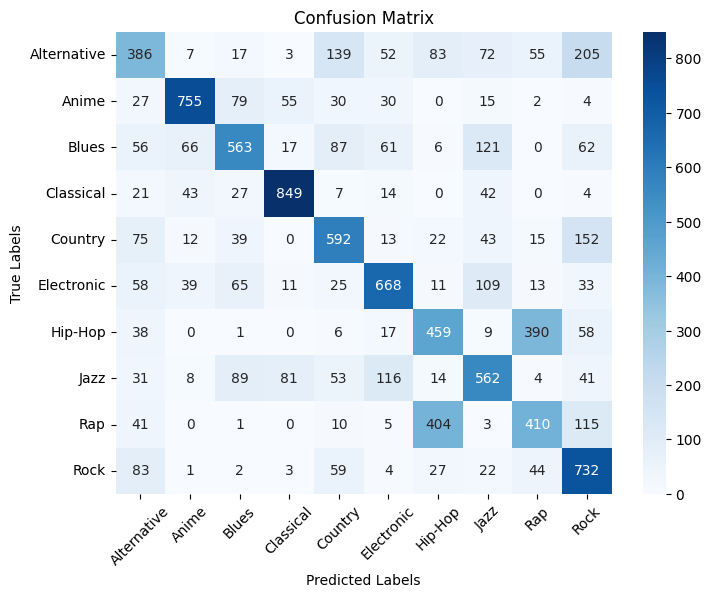

In [ ]:
unique_labels = sorted(set(y_test))
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)

plt.xticks(ticks=[i + 0.5 for i in range(len(unique_labels))], labels=unique_labels, rotation=45)
plt.yticks(ticks=[i + 0.5 for i in range(len(unique_labels))], labels=unique_labels, rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Матрица ошибок показывает, что чаще всего модель путает Rap и Hip-Hop, что довольно логично, учитывая насколько эти жанры похожи.  
Кроме того, часто путаются похожие жанры Rock и Alternative.  

Можно предположить, что больший объем данных помог бы решить эту проблему.

### ROC-кривая

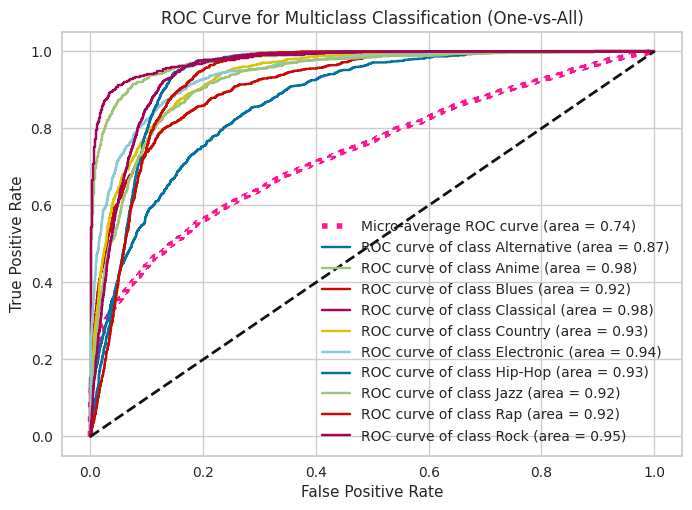

In [ ]:
y_score = catboost_clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(catboost_clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_test == catboost_clf.classes_[i]).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_micro, tpr_micro, _ = roc_curve((y_test.ravel() == catboost_clf.classes_[np.argmax(y_score, axis=1)]).astype(int), np.max(y_score, axis=1))
roc_auc_micro = auc(fpr_micro, tpr_micro)

plt.figure()
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(len(catboost_clf.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(catboost_clf.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification (One-vs-All)')
plt.legend(loc="lower right")
plt.show()

Высокие значения *ROC-AUC* показывают, что модель очень хорошо отличает классы по принципу *One-vs-All*, но низкое значение *Micro-Average* говорит, что в общем случае модель может чаще ошибаться.

### PR-кривая

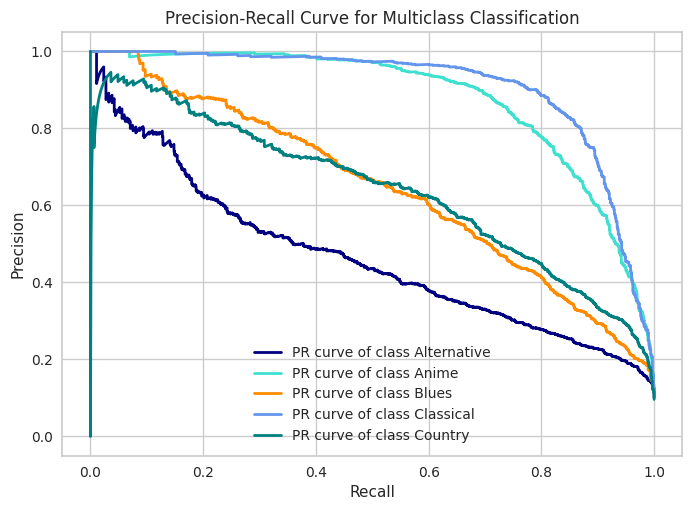

In [ ]:
precision = dict()
recall = dict()
for i in range(len(catboost_clf.classes_)):
    precision[i], recall[i], _ = precision_recall_curve((y_test == catboost_clf.classes_[i]).astype(int), y_score[:, i])

plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal']
for i, color in zip(range(len(catboost_clf.classes_)), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='PR curve of class {0}'.format(catboost_clf.classes_[i]))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multiclass Classification")
plt.legend(loc="best")
plt.show()

PR-кривая показывает соотношение *Precision* и *Recall* при различных значениях порога.

### Распределение классов

Взглянем на распределения классов на тестовой и прогнозной выборках.

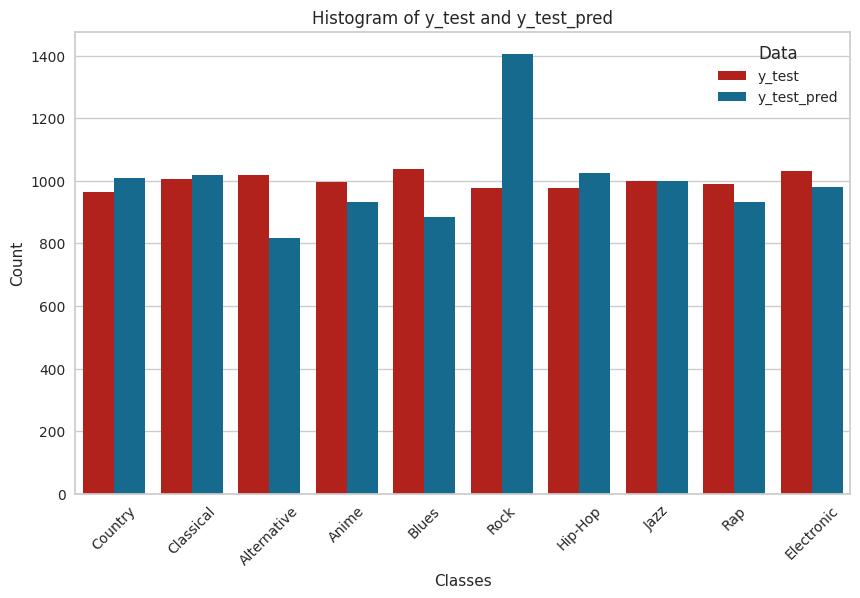

In [ ]:
df = pd.DataFrame({'y_test': y_test.squeeze(), 'y_test_pred': y_test_pred.squeeze()})

plt.figure(figsize=(10, 6))
sns.countplot(data=df.melt(value_name='Classes'), x='Classes', hue='variable', palette=['r', 'b'])

plt.title('Histogram of y_test and y_test_pred')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Data', loc='upper right')
plt.show()

По графику видно, что класс *Rock* предсказывается моделью чаще остальных, и связано это, скорее всего, с его сходством с классом *Alternative*, который как раз наоборот предсказывается реже остальных.

# Выводы

В результате анализа данных и метрик было обнаружено, что использование ансамблей моделей превосходит простой подход, основанный на единственной модели. Ансамбли моделей комбинируют несколько моделей вместе для улучшения общей производительности предсказаний. Этот подход позволил уменьшить ошибку предсказания и повысить обобщающую способность модели.

В частности, градиентный бустинг, представленный моделью *CatBoostClassifier*, показал значительное превосходство над простым решающим деревом *DecisionTreeClassifier*. Градиентный бустинг - это метод ансамблирования, который последовательно обучает модели, используя результаты предыдущих моделей для улучшения качества предсказаний. Это позволяет создать более сложную и мощную модель, способную выявлять сложные зависимости в данных.

17% разницы в результате между *CatBoostClassifier* и *DecisionTreeClassifier* свидетельствует о значительном улучшении производительности модели при использовании градиентного бустинга. Это довольно большая прибавка, особенно в контексте мультиклассовой классификации, где точность предсказаний играет ключевую роль в правильной классификации объектов.

Кроме того, стоит отметить, что выбор подходящего метода обучения модели является ключевым этапом в построении успешной системы машинного обучения. Понимание принципов работы различных методов и их преимуществ помогает выбрать наиболее подходящий алгоритм для конкретной задачи.